In [1]:
import pandas as pd
import numpy as np
import plotnine as p9
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


# pandas plots

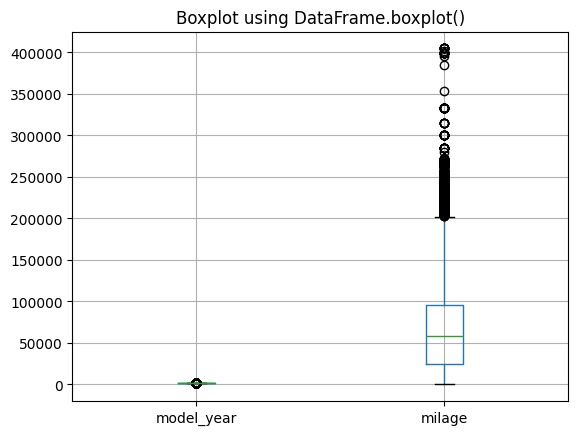

In [4]:
data.boxplot(column=['model_year', 'milage'])
plt.title('Boxplot using DataFrame.boxplot()')
plt.show()

# plotnine plots

## boxplot

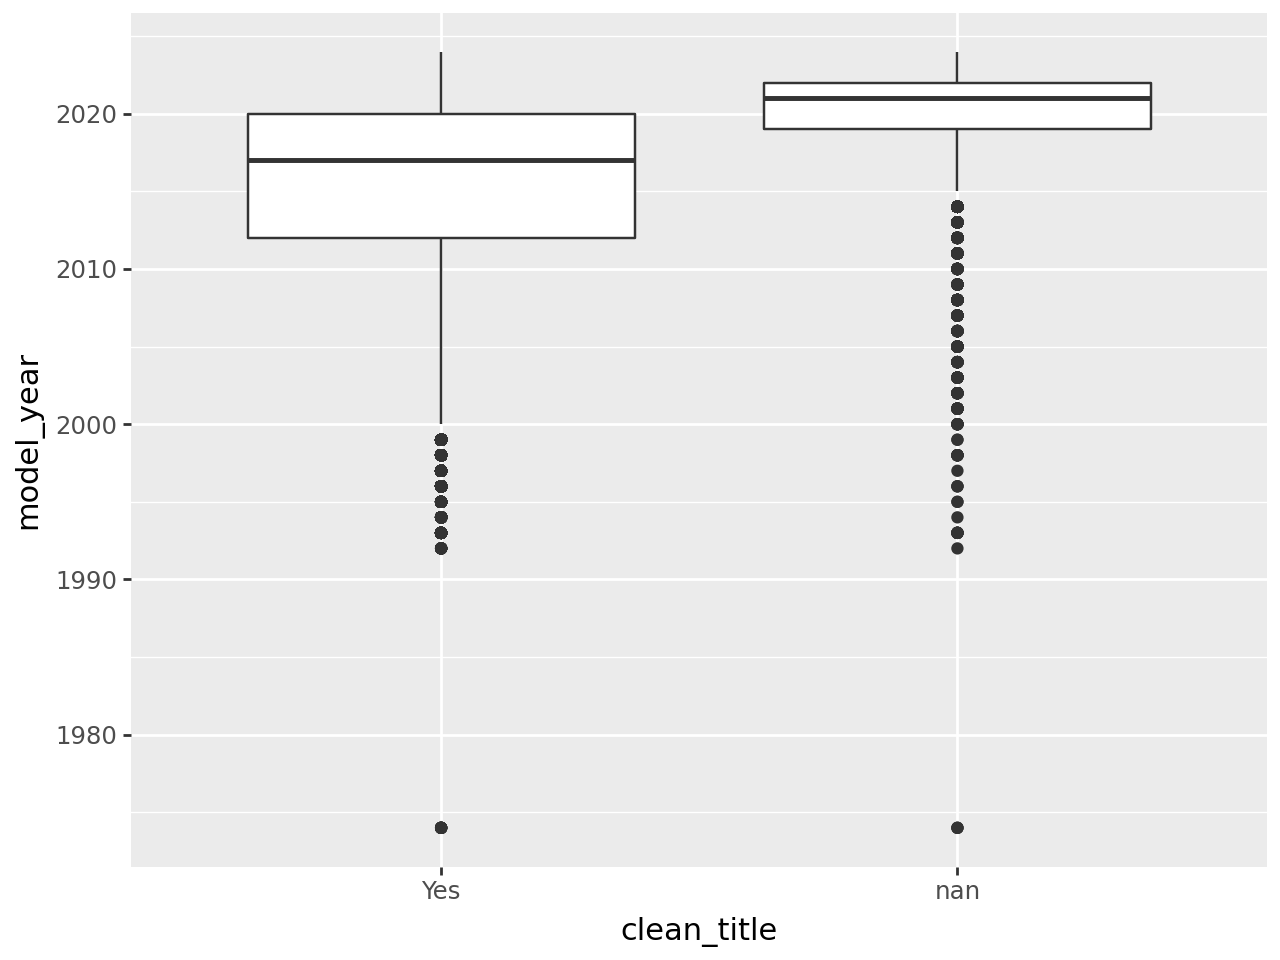

In [ ]:
# boxplot
(
p9.ggplot(
    data = data,
    mapping = p9.aes(x ='clean_title', y='model_year')
) +
    p9.geom_boxplot()
)

## barplot

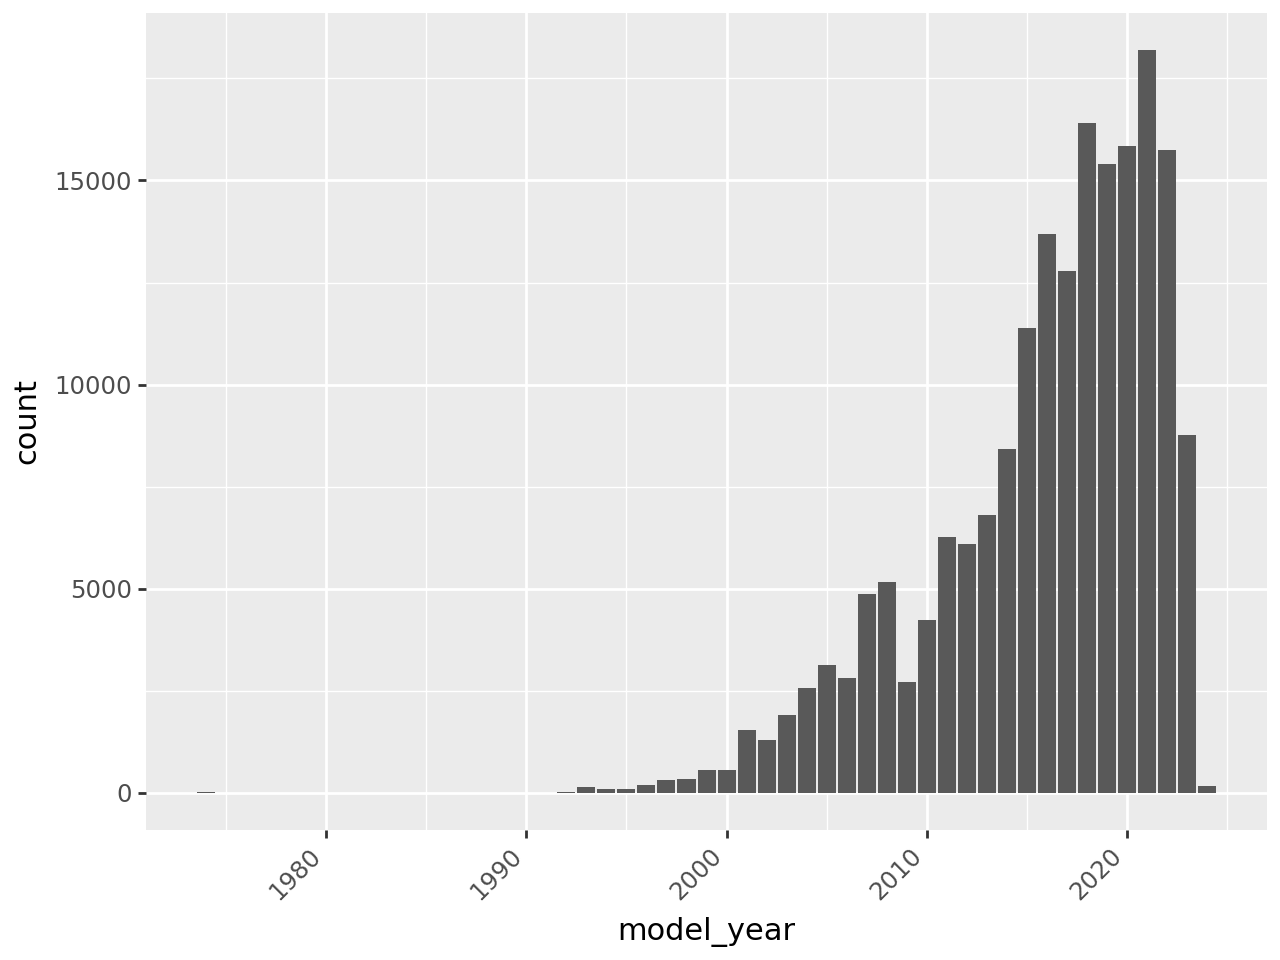

In [51]:
# barplot
(
p9.ggplot(
    data = data,
    mapping = p9.aes(x = 'model_year')
) +
    p9.geom_bar() +
    p9.theme(axis_text_x=p9.element_text(rotation=45, hjust=1))
)

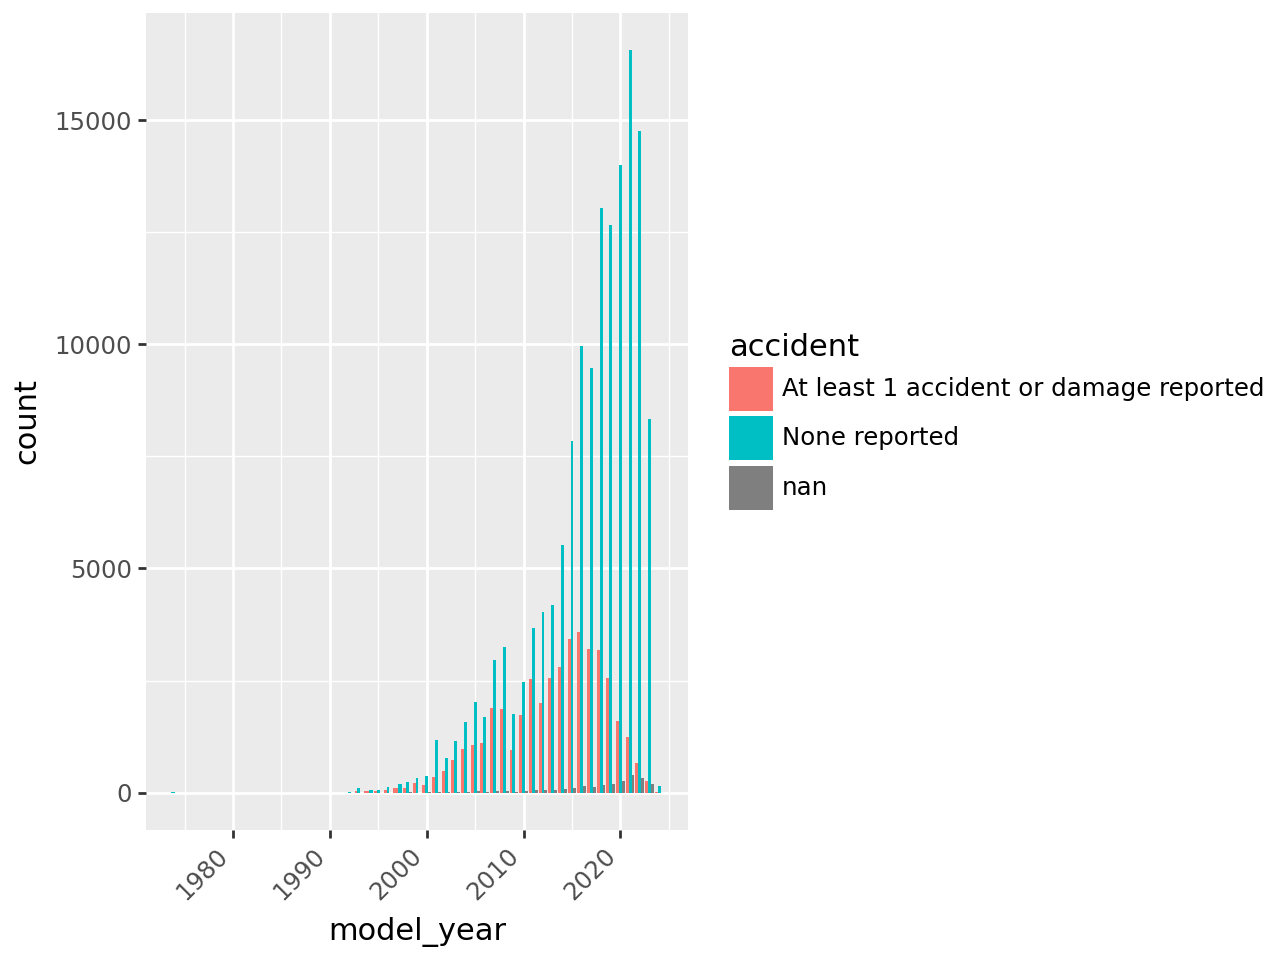

In [ ]:
# barplot
(
p9.ggplot(
    data = data,
    mapping = p9.aes(x = 'model_year', fill='accident')    # use color or fill parameter
) +
    p9.geom_bar(position='dodge') + # use stack, dodge or fill
    p9.theme(axis_text_x=p9.element_text(rotation=45, hjust=1))
)

## scatterplot

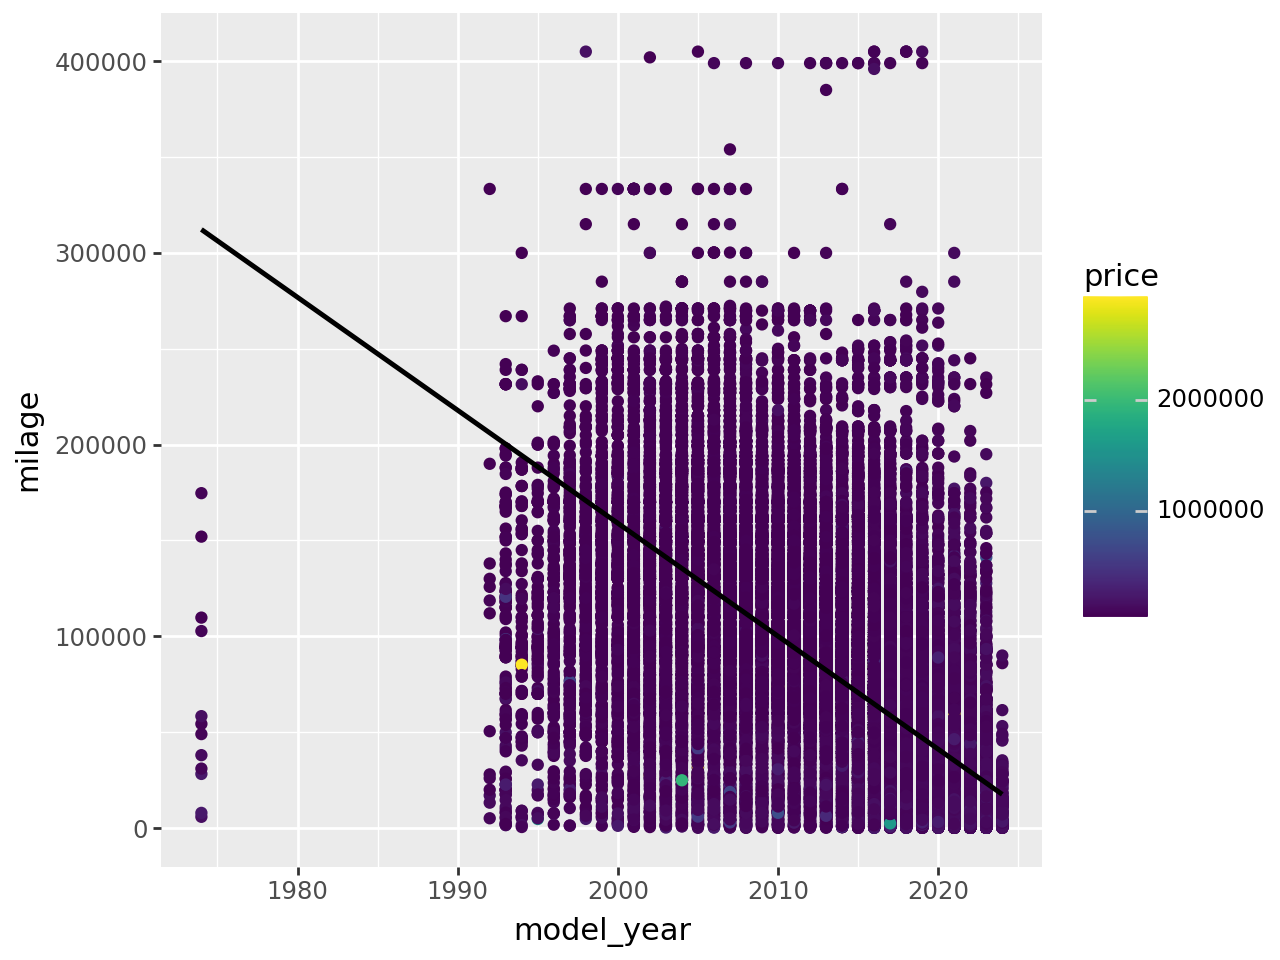

In [48]:
# scatterplot
(
    p9.ggplot(data, mapping = p9.aes(x='model_year', y='milage', color='price'))
    + p9.geom_point() +
    p9.geom_smooth(method = 'lm')
)

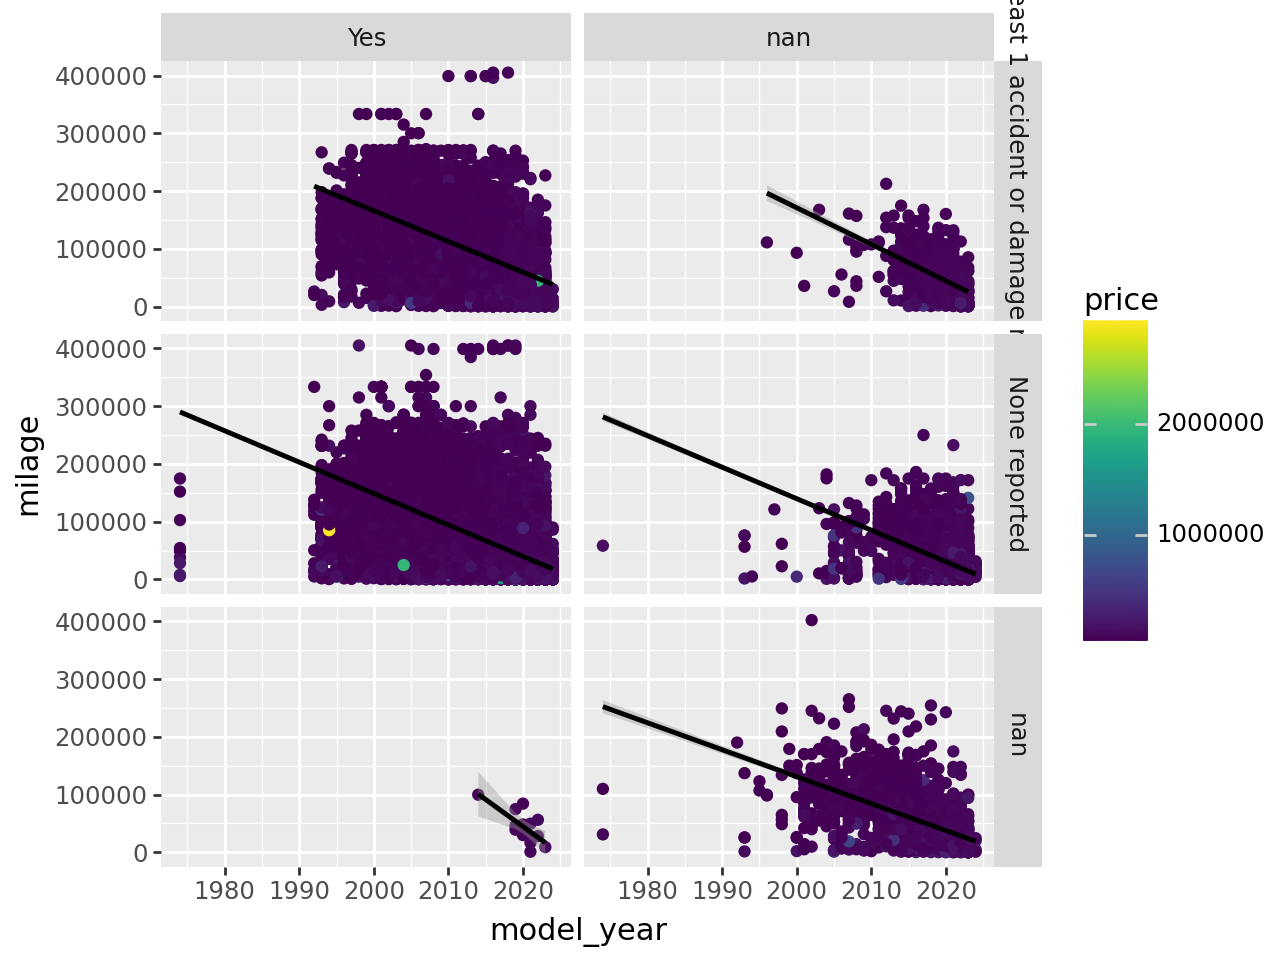

In [ ]:
# scatterplot
(
    p9.ggplot(data, mapping = p9.aes(x='model_year', y='milage', color='price'))
    + p9.geom_point() +
    p9.geom_smooth(method = 'lm') +
    p9.facet_grid('accident ~ clean_title') # or facet_wrap
)

## histogram

c:\Users\Gerri\anaconda3\envs\data\Lib\site-packages\plotnine\layer.py:293: PlotnineWarning: stat_bin : Removed 1941 rows containing non-finite values.
c:\Users\Gerri\anaconda3\envs\data\Lib\site-packages\plotnine\layer.py:372: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


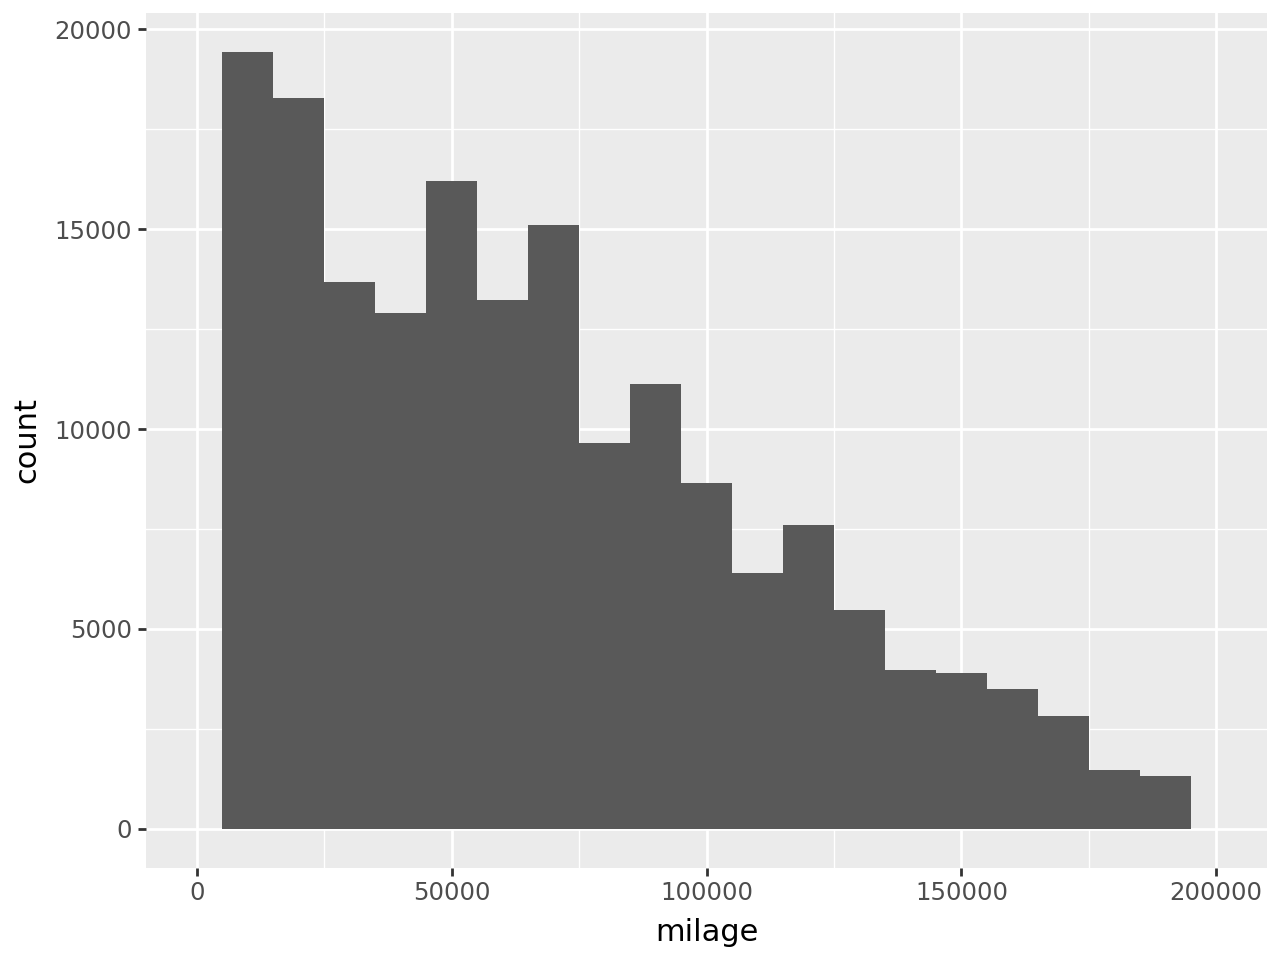

In [ ]:
(p9.ggplot(
    data = data,
    mapping = p9.aes(x = 'milage')
 ) +
    p9.geom_histogram(binwidth=10000)  # use bins or binwidth
+ p9.lims(
        x=(0, 200000),
      #   y=(50000, 250000)
    )
)

# pyplot plots

In [ ]:
def scatter(df, columnX, columnY, title=''):
    plt.scatter(data[columnX], data[columnY])

    plt.xlabel(columnX)
    plt.ylabel(columnY)
    plt.title('Price vs Milage')
    plt.show()

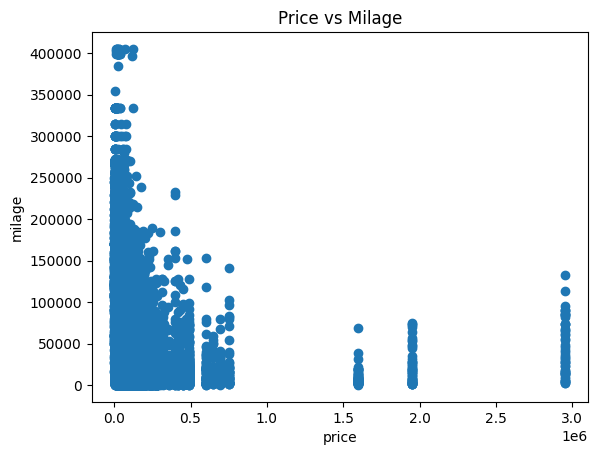

In [ ]:
scatter(data, 'price', 'milage')

In [ ]:
def barplot(df, column, title=''):
    counts = data[column].value_counts()

    plt.bar(counts.index, counts.values)

    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

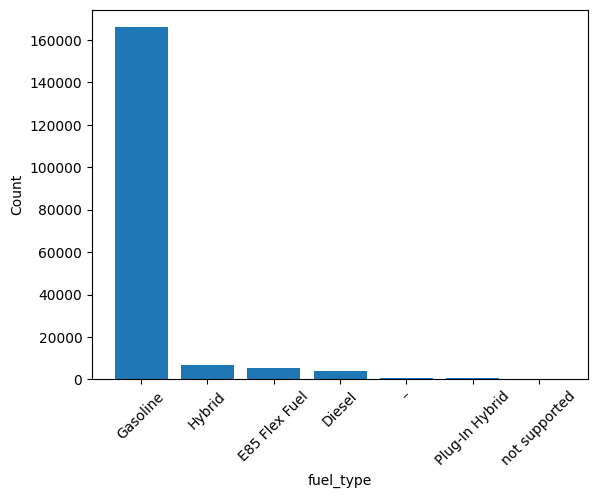

In [ ]:
barplot(data, 'fuel_type')

In [ ]:
def histogram(df, column, bins=30, Title=''):
    plt.hist(df[column], bins=bins)

    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Price Distribution')
    plt.show()

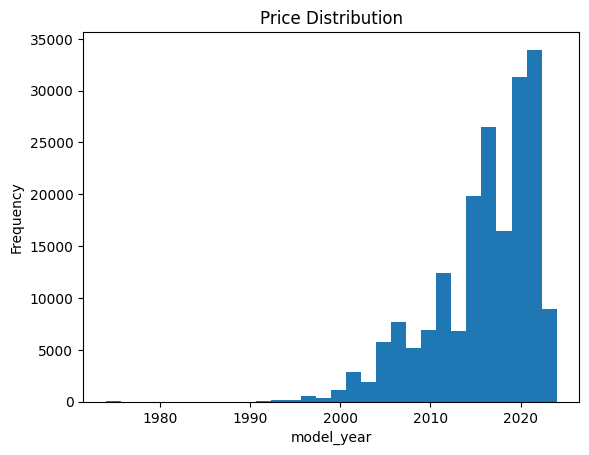

In [ ]:
histogram(data, 'model_year')